# Project 2: Customer Churn Prediction

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\Ongoing\\Machine learning\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
# Here Customer ID is not very important data so let's remove 'customer id' column

df1 = df.drop('customerID', axis = 1)

In [36]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [38]:
# As we can observe in above three tab that 'TotalCharges' must be numeric so for that

df1['TotalCharges'].values

# they must not in ' '

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [39]:
df1['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [40]:
# or
pd.to_numeric(df1['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [41]:
# But the problem here is there is null " " (null values)

In [42]:
# Let's try to ignore the errors

pd.to_numeric(df1['TotalCharges'], errors='coerce')

# coerce: try to ignore the error

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [43]:
df1[pd.to_numeric(df1['TotalCharges'], errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [44]:
df1.shape

(7043, 20)

In [45]:
df1[pd.to_numeric(df1['TotalCharges'], errors = 'coerce').isnull()].shape

(11, 20)

Converting the total charges into numerical form by ignoring the errors and leave them as a null values

In [46]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'] , errors='coerce')

In [47]:
# As we can see here that only 11 samples are null from 7043 data rows, so we can remove it. So for that
# or we can say Drop the samples where total charges are null or blank 
df2 = df1[~df1['TotalCharges'].isnull()]

In [48]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
# Now let's find out the customers who are not leaving so for that

df2[df2['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Data Visualization

In [50]:
# Tenure of customers who didn't leave
tenure_churn_no = df2[df2['Churn'] == "No"].tenure

In [51]:
# Tenure of customers who leave
tenure_churn_yes = df2[df2['Churn'] == 'Yes'].tenure

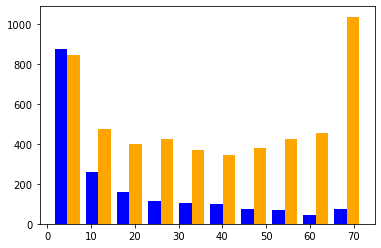

In [52]:
# Let's plot the graph 

plt.hist([tenure_churn_yes, tenure_churn_no], color=('blue', 'orange'))
plt.show()

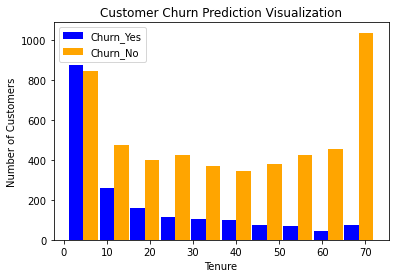

In [53]:
tenure_churn_no = df2[df2['Churn'] == "No"].tenure
tenure_churn_yes = df2[df2['Churn'] == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth = 0.95, color = ('blue','orange'), label=['Churn_Yes','Churn_No'])
plt.legend()
plt.show()

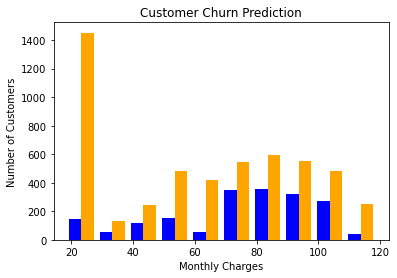

In [54]:
# Let's perform the same for monthly charges

monthly_charges_churn_no = df2[df2['Churn']=='No'].MonthlyCharges
monthly_charges_churn_yes = df2[df2["Churn"]=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no],color=('blue','orange'),label= (['Churn_Yes','Churn_No']))
plt.show()

In [55]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
for column in df2.columns:
    if(df2[column].dtypes == 'object'):
        print(f'{column} : {df2[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [57]:
def print_unique_value(df):
    for column in df.columns:
        if(df[column].dtypes == 'object'):
            print(f'{column} : {df[column].unique()}')

print_unique_value(df2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Here we can see that No phone services and no internet services are also no so for that

So lets convert "no phone services " and "no internet services" into "NO"

In [58]:
df2 = df2.replace('No phone service','No')

In [59]:
df2 = df2.replace('No internet service', 'No')

In [60]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [61]:
print_unique_value(df2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Now let's convert these column to interger from object type so for that

Convert Yes: 1 and No: 0

In [62]:
df3 = df2.replace('Yes', 1)

In [63]:
df3 = df3.replace('No', 0)

In [64]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [65]:
# or
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' ,
                  'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' ,
                  'Churn']

for column in yes_no_columns:
    df3.replace({'Yes':1, 'No':0}, inplace=True)

In [66]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [67]:
for column in df3.columns:
    print(f'{column}:{df2[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [68]:
df3['gender'] = df3['gender'].replace({'Female':1 , 'Male':0})

# or
# df3['gender'].replace({'Female':1 , 'Male':0}, inplace=True)

In [69]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


Now let's convert remaining columns into numeric form using get dummies function

In [70]:
df4 = pd.get_dummies(data=df3, columns=['InternetService','Contract','PaymentMethod'])
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [71]:
df4.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

Now let's separate features and labels into x and y

In [72]:
X = df4.drop('Churn' , axis=1)
Y = df4['Churn']

Train test spliting

In [73]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0, test_size = 0.2)

# 1. Logistic  Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()

In [75]:
lmodel.fit(xtrain, ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
print('Training Accuracy', lmodel.score(xtrain,ytrain))
print('Testing Accuracy', lmodel.score(xtest, ytest))

Training Accuracy 0.8062222222222222
Testing Accuracy 0.7995735607675906


In [77]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(ytrain, lmodel.predict(xtrain))
cm_test = confusion_matrix(ytest, lmodel.predict(xtest))

Text(51.0, 0.5, 'Truth')

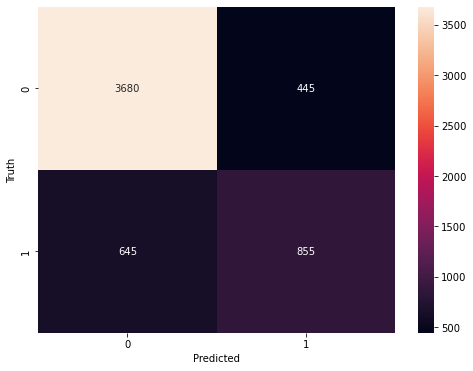

In [78]:
import seaborn as sns

plt.figure(figsize = (8,6))
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# annot: annotation and fmt: format

Text(51.0, 0.5, 'Truth')

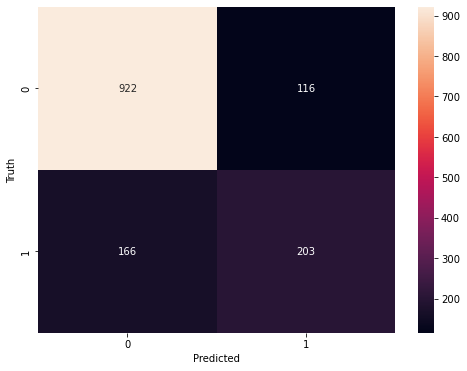

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now let's find out the value of area under curve

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
ytrain_pred_proba = lmodel.predict_proba(xtrain)[:,1]
ytest_pred_proba = lmodel.predict_proba(xtest)[:,1]

In [82]:
auc_train = roc_auc_score(ytrain, ytrain_pred_proba)
auc_test = roc_auc_score(ytest, ytest_pred_proba)

In [83]:
print(auc_train)
print(auc_test)

0.8488404848484848
0.835352799578092


In [84]:
fpr, tpr, thresh = roc_curve(ytrain, ytrain_pred_proba)

In [85]:
g_value = tpr*(1-fpr)
g_value

array([0.        , 0.00066667, 0.00466667, ..., 0.03318998, 0.03321212,
       0.        ])

In [86]:
np.max(g_value)

0.5928294141414141

In [87]:
index = np.argmax(g_value)
index

1008

In [88]:
thresh[index]

0.2854593437396433

In [89]:
print(fpr[index], tpr[index])

0.2564848484848485 0.7973333333333333


Evaluate the model performance for threshold value 0.2854 

In [90]:
train_prediction = np.where(lmodel.predict_proba(xtrain)[:,1] >= 0.2854593437396433, 1, 0)
test_prediction = np.where(lmodel.predict_proba(xtest)[:,1] >= 0.2854593437396433, 1, 0)

In [91]:
(ytrain == train_prediction).sum() / len(xtrain)

0.7578666666666667

In [92]:
(ytest == test_prediction).sum() / len(xtest)

0.7526652452025586

Text(51.0, 0.5, 'Truth')

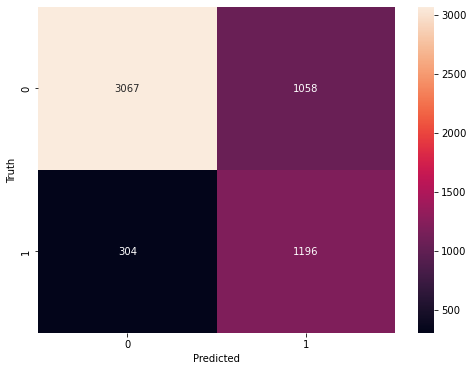

In [93]:
cm_train = confusion_matrix(ytrain , train_prediction)
cm_test = confusion_matrix(ytest , test_prediction)

plt.figure(figsize = (8,6))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(51.0, 0.5, 'Truth')

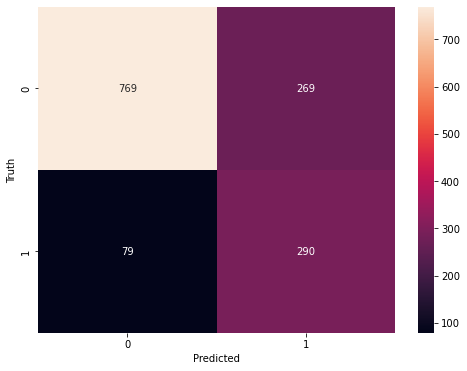

In [94]:
plt.figure(figsize = (8,6))
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

As we can see here the Accuracy came down but then too this model is better than previous model because it is less biased model. 

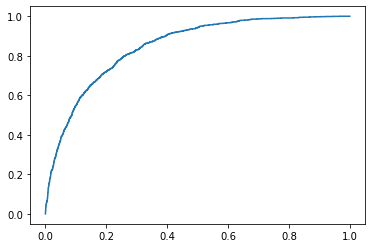

In [95]:
plt.plot(fpr,tpr)
plt.show()

In [96]:
3067 / (3067+1058)

0.7435151515151515

In [97]:
1196/(1196+304)

0.7973333333333333

In [98]:
769/(769+269)

0.7408477842003853

In [99]:
290/(290+79)

0.7859078590785907

Using roc curve the accuracy for class 1 is increased from 55% to 79% that's why we can say it is less biased model

# 2. Support Vector Machine 

In [100]:
from sklearn.svm import SVC
smodel = SVC(probability=True)

In [101]:
smodel.fit(xtrain,ytrain)

SVC(probability=True)

In [102]:
print(smodel.score(xtrain, ytrain))
print(smodel.score(xtest, ytest))

0.7333333333333333
0.7377398720682303


In [103]:
ytrain_pred_prob = smodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = smodel.predict_proba(xtest)[:,1]

In [104]:
auc_train = roc_auc_score(ytrain, ytrain_pred_prob)
auc_test = roc_auc_score(ytest, ytest_pred_prob)

In [105]:
print(auc_train)
print(auc_test)

0.7968171313131313
0.7878829414498384


In [106]:
fpr_s, tpr_s, thresh_s = roc_curve(ytrain, ytrain_pred_prob)

In [107]:
g_value_s = tpr_s*(1-fpr_s)
g_value_s

array([0.        , 0.00066667, 0.00333333, ..., 0.02253042, 0.02254545,
       0.        ])

In [108]:
np.max(g_value_s)

0.5300942222222222

In [109]:
index = np.argmax(g_value_s)

In [110]:
thresh[index]

0.31227261335480055

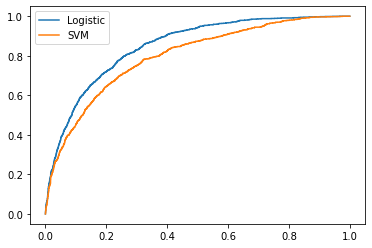

In [111]:
plt.plot(fpr,tpr, label='Logistic')
plt.plot(fpr_s,tpr_s, label='SVM')
plt.legend()
plt.show()

# 3. Random Forest model

In [112]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=5)

In [113]:
rmodel.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5)

In [114]:
print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest, ytest))

0.8076444444444445
0.7945984363894811


In [115]:
ytrain_pred_prob = rmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = rmodel.predict_proba(xtest)[:,1]

In [116]:
auc_train = roc_auc_score(ytrain, ytrain_pred_prob)
auc_test = roc_auc_score(ytest, ytest_pred_prob)

In [117]:
print(auc_train)
print(auc_test)

0.8608918787878788
0.8414399172893463


In [118]:
fpr_r, tpr_r, thresh_r = roc_curve(ytrain, ytrain_pred_prob)

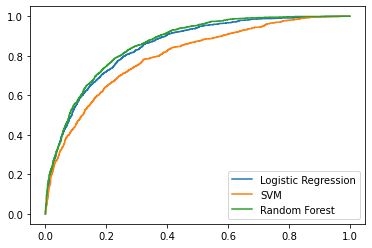

In [119]:
plt.plot(fpr,tpr, label='Logistic Regression')
plt.plot(fpr_s, tpr_s, label='SVM')
plt.plot(fpr_r,tpr_r,label='Random Forest')
plt.legend()
plt.show()

# 4. Neural Network Model

In [120]:
xtrain.shape[1]

26

In [121]:
col_scale = ['tenure' ,'MonthlyCharges' ,'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xtrain[col_scale] = scaler.fit_transform(xtrain[col_scale])
xtest[col_scale] = scaler.fit_transform(xtest[col_scale])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [122]:
ytrain.shape

(5625,)

In [123]:
from keras import models
from keras import layers

nmodel = models.Sequential()
nmodel.add(layers.Dense(16, input_dim=xtrain.shape[1]))
nmodel.add(layers.Dense(1))


In [124]:
nmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                432       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [126]:
from keras import optimizers
from keras import metrics

nmodel.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])

In [127]:
nmodel.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
176/176 [==============================] - 3s 5ms/step - loss: 0.1985 - accuracy: 0.7356
Epoch 2/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1547 - accuracy: 0.7707
Epoch 3/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1467 - accuracy: 0.7844
Epoch 4/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1442 - accuracy: 0.7956
Epoch 5/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1433 - accuracy: 0.7963
Epoch 6/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1422 - accuracy: 0.8009
Epoch 7/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1420 - accuracy: 0.7995
Epoch 8/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1418 - accuracy: 0.7996
Epoch 9/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1417 - accuracy: 0.7984
Epoch 10/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1416 - accuracy: 0.7977

In [128]:
nmodel.evaluate(xtest,ytest)

44/44 [==============================] - 1s 5ms/step - loss: 0.1437 - accuracy: 0.8060


[0.14370350539684296, 0.8059701323509216]

In [129]:
from keras import models
from keras import layers

nmodel = models.Sequential()                                       
nmodel.add(layers.Dense(16 , activation = 'relu' , input_dim = xtrain.shape[1]))           
nmodel.add(layers.Dense(1 , activation = 'sigmoid'))                                        

In [130]:
nmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                432       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [131]:
from keras import optimizers
from keras import metrics

nmodel.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [132]:
nmodel.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
176/176 [==============================] - 3s 6ms/step - loss: 0.6030 - accuracy: 0.6839
Epoch 2/30
176/176 [==============================] - 1s 6ms/step - loss: 0.5197 - accuracy: 0.7458
Epoch 3/30
176/176 [==============================] - 1s 6ms/step - loss: 0.4855 - accuracy: 0.7664
Epoch 4/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4654 - accuracy: 0.7774
Epoch 5/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4531 - accuracy: 0.7826
Epoch 6/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4455 - accuracy: 0.7877
Epoch 7/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4402 - accuracy: 0.7888
Epoch 8/30
176/176 [==============================] - 1s 6ms/step - loss: 0.4359 - accuracy: 0.7920
Epoch 9/30
176/176 [==============================] - 1s 6ms/step - loss: 0.4332 - accuracy: 0.7918
Epoch 10/30
176/176 [==============================] - 1s 6ms/step - loss: 0.4307 - accuracy: 0.7924

In [133]:
nmodel.evaluate(xtest,ytest)

44/44 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.8017


[0.4295172691345215, 0.8017057776451111]

In [134]:
ytrain_pred_prob = nmodel.predict(xtrain)
ytest_pred_prob = nmodel.predict(xtest)

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

44/44 [==============================] - 0s 3ms/step
0.8462557575757576
0.832274647409287


In [135]:
fpr_n, tpr_n, thresh_n = roc_curve(ytrain, ytrain_pred_prob)

In [136]:
g_value = tpr_n*(1-fpr_n)
g_value

array([0.        , 0.00066667, 0.00866667, ..., 0.01647386, 0.01648485,
       0.        ])

In [137]:
index = np.argmax(g_value)
index

1008

In [138]:
thresh[index]

0.2854593437396433

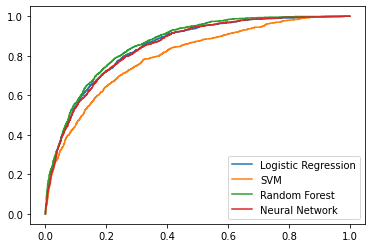

In [139]:
plt.plot(fpr,tpr, label="Logistic Regression")
plt.plot(fpr_s,tpr_s,label="SVM")
plt.plot(fpr_r,tpr_r, label="Random Forest")
plt.plot(fpr_n, tpr_n, label="Neural Network")
plt.legend()
plt.show()

Prediction

In [140]:
nmodel.predict(xtest.values[50].reshape(1,26))

1/1 [==============================] - 0s 150ms/step


array([[0.56461054]], dtype=float32)

In [141]:
np.round(nmodel.predict(xtest.values[50].reshape(1,26)))

1/1 [==============================] - 0s 56ms/step


array([[1.]], dtype=float32)

In [142]:
nmodel.predict(xtest.values[6].reshape(1,26))

1/1 [==============================] - 0s 91ms/step


array([[0.3737315]], dtype=float32)

In [143]:
np.round(nmodel.predict(xtest.values[6].reshape(1,26)))

1/1 [==============================] - 0s 65ms/step


array([[0.]], dtype=float32)

44/44 [==============================] - 0s 4ms/step


Text(51.0, 0.5, 'Truth')

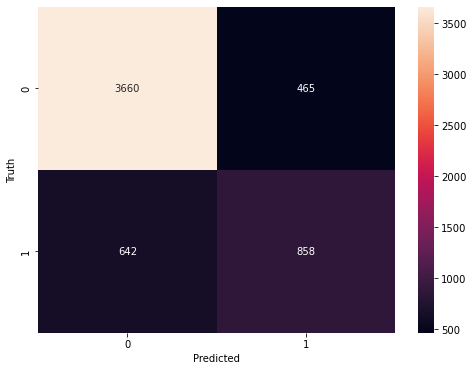

In [144]:
cm_train = confusion_matrix(ytrain , np.round(nmodel.predict(xtrain)))
cm_test = confusion_matrix(ytest , np.round(nmodel.predict(xtest)))

plt.figure(figsize = (8,6))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(51.0, 0.5, 'Truth')

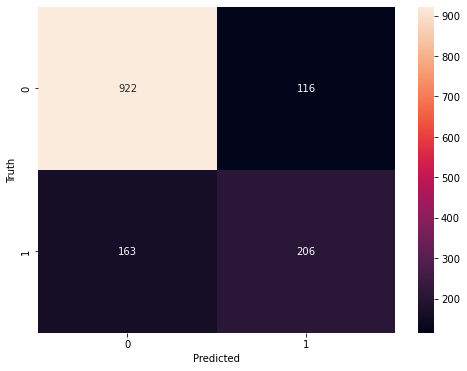

In [145]:
plt.figure(figsize = (8,6))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of my model if i want to use threshold value as 0.30 to make decision as 0 or 1 ...?

In [146]:
train_prediction = np.where(nmodel.predict(xtrain) >= 0.29977080083711305, 1, 0)
test_prediction = np.where(nmodel.predict(xtest) >= 0.29977080083711305, 1, 0)

44/44 [==============================] - 0s 4ms/step


In [147]:
(ytrain == train_prediction.ravel()).sum() / len(xtrain)

0.7605333333333333

In [148]:
(ytest == test_prediction.ravel()).sum() / len(xtest)

0.7547974413646056

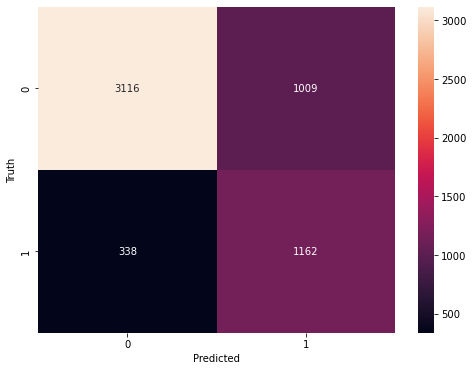

In [149]:
cm_train = confusion_matrix(ytrain , train_prediction.ravel())
cm_test = confusion_matrix(ytest , test_prediction.ravel())

plt.figure(figsize = (8,6))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [150]:
print(3120/(3120+1005))
print(1170/(1170+330))

0.7563636363636363
0.78


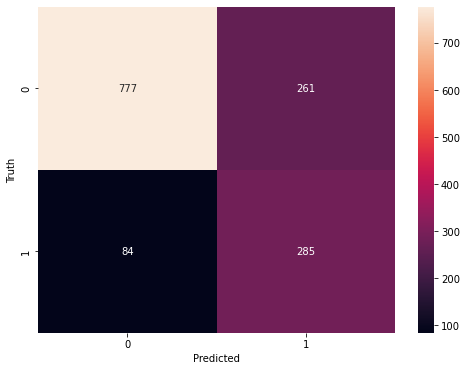

In [151]:
plt.figure(figsize = (8,6))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [152]:
print(779/(779+259))
print(278/(278+91))

0.7504816955684007
0.7533875338753387


# Summary

Model is 80% accurate but more biased towards category 0 in case default threshold value is 0.5 to make decision about 0 or 1. Individual accuracy for category 0 is close to 90% and for category 1 it is close to 50%

Model is approx 77% accurate if the decision making threshold came down to 0.30 and individual accuracy for both category also remain close to 77% i.e. accuracy for category 0 decreases but for category 1 incresed and model is no more biased towards a particular category